In [157]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image 

In [158]:
train_dir = 'chest_xray/train'
val_dir = 'chest_xray/val'
test_dir = 'chest_xray/test'

In [159]:
train_datagen = ImageDataGenerator(
    rescale=1./255,   # Normalize pixel values to [0, 1]
    shear_range=0.2,  # Random shear
    zoom_range=0.2,   # Random zoom
    horizontal_flip=True  # Randomly flip images
)

In [160]:
val_datagen = ImageDataGenerator(rescale=1./255)

In [161]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize all images to 150x150
    batch_size=32,           # Process 32 images at a time
    class_mode='binary'      # Binary classification: pneumonia or normal
)

Found 1548 images belonging to 2 classes.


In [162]:
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 16 images belonging to 2 classes.


In [163]:
model = models.Sequential()

In [164]:
# First convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

In [165]:
# Second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [166]:
# Third convolutional layer
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [167]:
# Flatten the results to feed into a dense layer
model.add(layers.Flatten())

In [168]:
# Fully connected layer
model.add(layers.Dense(128, activation='relu'))

In [169]:
# Output layer (binary classification)
model.add(layers.Dense(1, activation='sigmoid'))

In [170]:
model.compile(
    optimizer=Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
test_datagen = ImageDataGenerator(rescale=1./255)

In [171]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 484 images belonging to 2 classes.


In [172]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 579ms/step - accuracy: 0.5031 - loss: 0.6926
Test accuracy: 0.4834710657596588


In [173]:
x_batch, y_batch = next(train_generator)

In [174]:
# Plotting the images in the batch
plt.figure(figsize=(10, 10))


<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

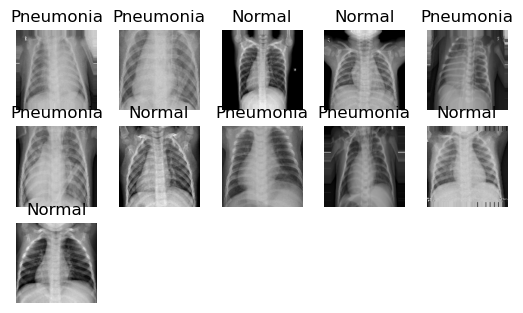

In [175]:
for i in range(11):  # Display 9 images
    plt.subplot(4,5 , i + 1)
    plt.imshow(x_batch[i])
    plt.title('Pneumonia' if y_batch[i] == 1 else 'Normal')
    plt.axis('off')

In [176]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [177]:
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))  # Resize image to match model input size
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (1, 150, 150, 3)
    img_array /= 255.0  # Rescale pixel values to [0, 1]
    return img_array

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=4,  # Set to a higher value for better results
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)


Epoch 1/4
37/48 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5830 - loss: 0.7293

In [ ]:
 #Model evaluation
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")



In [ ]:
# Prediction on a single image
img_path ='chest_xray/train/PNEUMONIA/person502_virus_1011.jpeg'
img_array = load_and_preprocess_image(img_path)

prediction = model.predict(img_array)
if prediction[0] > 0.5:
    print("Pneumonia affected")
else:
    print("Normal")